In [217]:
import pandas as pd
#from pandas_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Loading data

In [254]:
raw_train_features = pd.read_csv('train_values.csv')
raw_train_labels = pd.read_csv('train_labels.csv')
raw_test_features = pd.read_csv('test_values.csv')
raw_train_features

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


### EDA

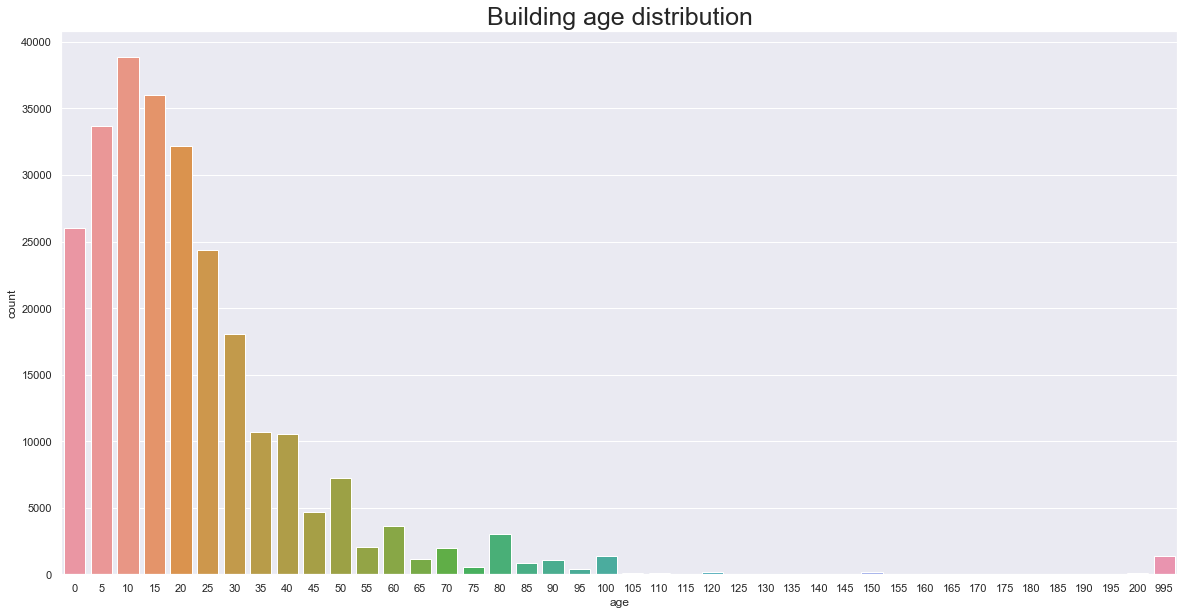

In [244]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(extended_train_features.age)
plt.title('Building age distribution', fontsize=25)
plt.show()

In [245]:
num_buildings = len(extended_train_features[extended_train_features.age > 100])
print('Number of buildings with more than 100 years:', num_rows, ', which represent ', weight_buildings, ' of the samples')
weight_buildings = len(extended_train_features[extended_train_features.age > 100]*100)/len(extended_train_features)

Number of buildings with more than 100 years: 2124 , which represent  0.008150390827356763  of the samples


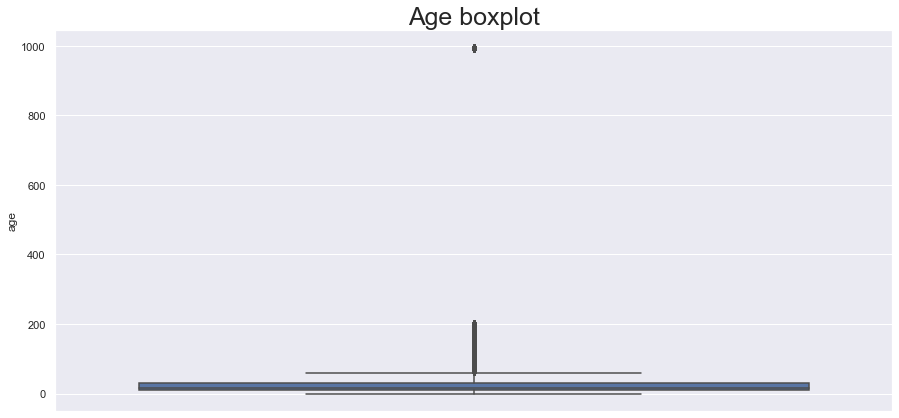

In [246]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=extended_train_features.age)
plt.title('Age boxplot', fontsize=25)
plt.show()

In [247]:
extended_train_features.age.describe()

count    260601.000000
mean         26.535029
std          73.565937
min           0.000000
25%          10.000000
50%          15.000000
75%          30.000000
max         995.000000
Name: age, dtype: float64

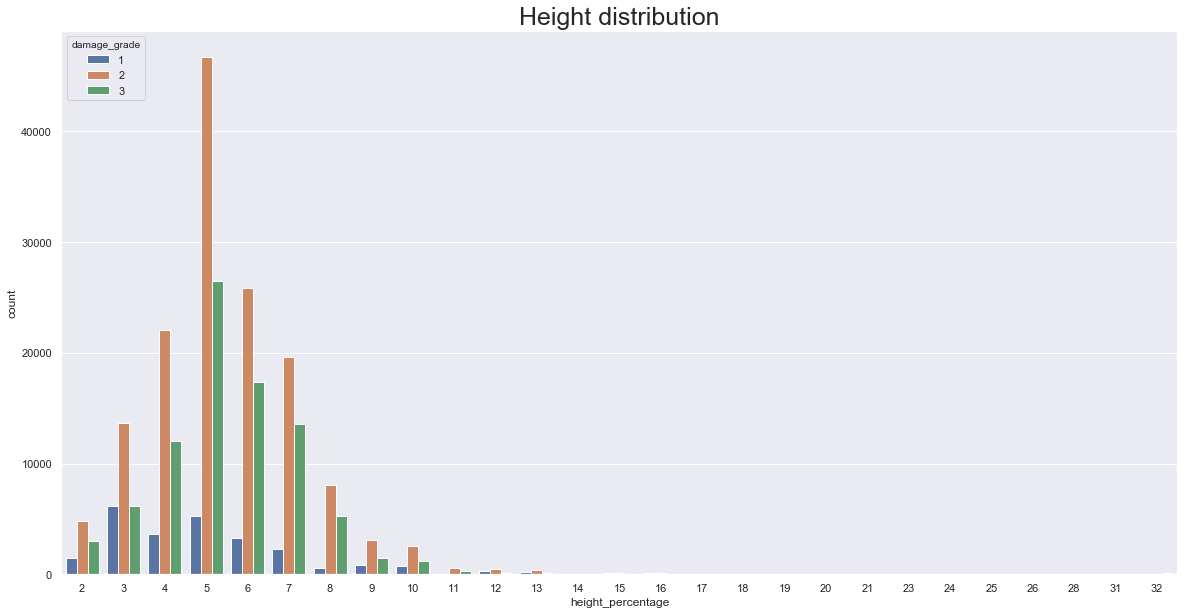

In [253]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x = extended_train_features.height_percentage, hue = raw_train_labels.damage_grade)
plt.title('Height distribution', fontsize=25)
plt.show()


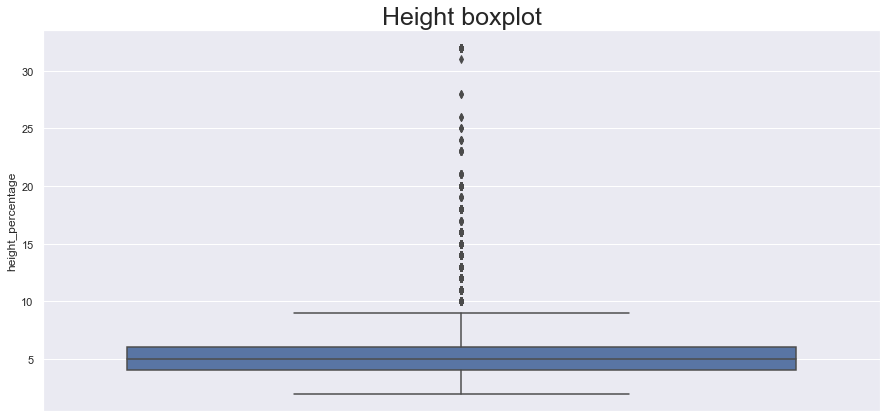

In [260]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=extended_train_features.height_percentage)
plt.title('Height boxplot', fontsize=25)
plt.show()

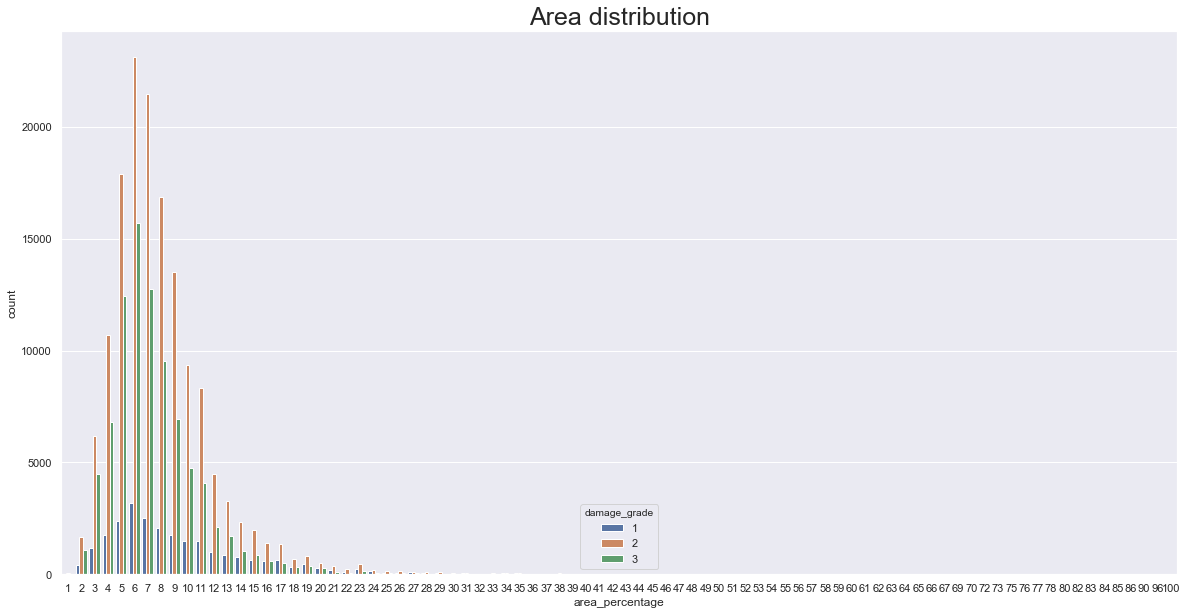

In [256]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x = extended_train_features.area_percentage, hue = raw_train_labels.damage_grade)
plt.title('Area distribution', fontsize=25)
plt.show()

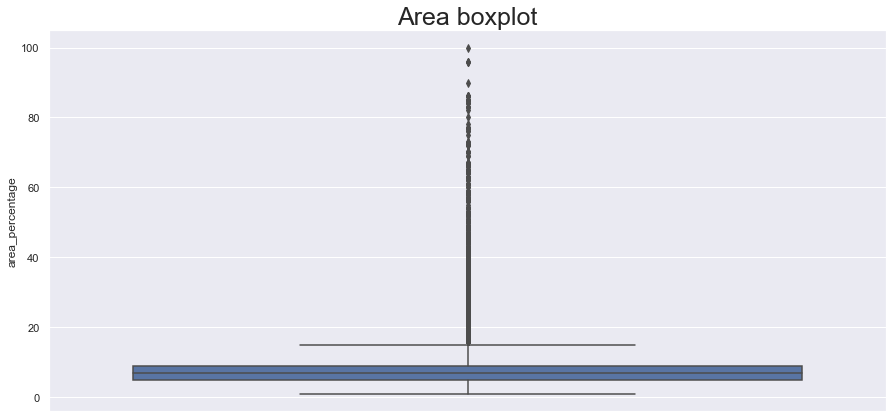

In [275]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=extended_train_features.area_percentage)
plt.title('Area boxplot', fontsize=25)
plt.show()

# Feature engineering

### Dealing with categorical variables

In [267]:
# One hot encoding of categorical variables

def hot_encode(df, lst):
    for i in lst:
        variable_df = pd.get_dummies(df[i], prefix = i)
        df = pd.concat([df, variable_df], axis=1)
        df = df.drop([i], axis=1)
    
    return df

categorical_features = ['foundation_type', 'land_surface_condition', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
extended_train_features = hot_encode(raw_train_features, categorical_features)

### Age

In [268]:
# Drop buildings with more that 100 years from train features and labels

building_index = extended_train_features[extended_train_features.age > 100].index
extended_train_labels = raw_train_labels.copy()
extended_train_labels.drop(building_index, inplace=True)
extended_train_features.drop(building_index, inplace=True)
print(len(extended_train_labels))
print(len(extended_train_features))

258477
258477


In [269]:
# Normalizing age data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(np.array(extended_train_features.iloc[:, 5]).reshape(-1,1))

extended_train_features.age = train_features_scaled

extended_train_features.age

0         0.30
1         0.10
2         0.10
3         0.10
4         0.30
          ... 
260596    0.55
260597    0.00
260598    0.55
260599    0.10
260600    0.10
Name: age, Length: 258477, dtype: float64

### Height

In [263]:
# Normalize heigth data

### Area

In [264]:
# Normalize area data

# Preparing the data for the ML models 

### Features and labels

In [270]:
labels = extended_train_labels['damage_grade']
labels = np.array(labels)

# Remove building id
features = extended_train_features.loc[:, extended_train_features.columns != 'building_id']
features = np.array(extended_train_features)

### Split data

In [271]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 5, shuffle=True)
print('Shape of data')
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)
print("")


Shape of data
(180933, 69)
(180933,)
(77544, 69)
(77544,)



### Distribution of train labels

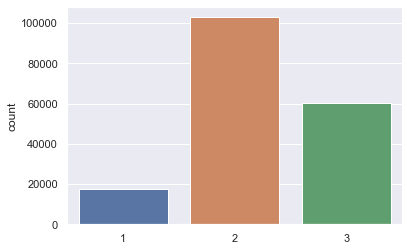

In [272]:
sns.set(style="darkgrid")
ax = sns.countplot(train_labels)

### Classes weights 

In [273]:
total_count = (sum(train_labels == 1) + sum(train_labels == 2) + sum(train_labels == 3))
actual_weight_1 = sum(train_labels == 1) * 100 / total_count
actual_weight_2 = sum(train_labels == 2) * 100 / total_count
actual_weight_3 = sum(train_labels == 3) * 100 / total_count
print('Class 1: ', actual_weight_1)
print('Class 2: ',actual_weight_2)
print('Class 3: ',actual_weight_3)

Class 1:  9.657718603018797
Class 2:  56.89011954701464
Class 3:  33.452161849966565


# Models

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#### Helpers

In [ ]:
def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    data_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    data_cm.index.name = 'Actual'
    data_cm.columns.name = 'Predicted'

    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(12,6))
    
    ax.set(yticks=[-0.5, 1.5], 
       xticks=[0, 1], 
       yticklabels=data_cm.index, 
       xticklabels=data_cm.columns)

    sns.heatmap(data_cm, cmap="Blues", annot=True, fmt='', ax=ax)
    return data_cm

### SVM

In [ ]:
svm_model = SVC(kernel = 'linear', class_weight={1:0.23, 2:0, 3:0.001},random_state=5).fit(train_features, train_labels)


In [ ]:
svm_prediction = svm_model.predict(test_features)

In [ ]:

svm_cm = confusionMatrix(test_labels, svm_prediction)
svm_accuracy = accuracy_score(test_labels, svm_prediction)
print(accuracy)

### Random Forest

In [ ]:
random_forest1 = RandomForestClassifier(n_estimators = 100)
random_forest1.fit(train_features, train_labels)

In [ ]:
random_prediction1 = random_forest1.predict(test_features)

In [ ]:
random_cm1 = confusionMatrix(test_labels, random_prediction1)
f1_score(test_labels, random_prediction1, average = 'micro')

### Logistic Regression

In [ ]:
logistic_model = LogisticRegression(random_state = 5, multi_class = 'ovr', verbose = 1).fit(train_features, train_labels)

In [ ]:
logistic_prediction = logistic_model.predict(test_features)

In [ ]:
random_cm = confusionMatrix(test_labels, logistic_prediction)
f1_score(test_labels, logistic_prediction, average = 'micro')

### Neuronal Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical



In [ ]:
# One hot encode train and test labels

label_encoder = LabelEncoder()
enc_train_labels = label_encoder.fit_transform(train_labels)
onehot_train_labels = to_categorical(enc_train_labels, num_classes=3)

label_encoder = LabelEncoder()
enc_test_labels = label_encoder.fit_transform(test_labels)
onehot_test_labels = to_categorical(enc_test_labels, num_classes=3)




In [ ]:
### Define the model

NB_EPOCHS = 1000
BATCH_SIZE = 16

nn_model = Sequential()

# Input layer
nn_model.add(Dense(512, input_shape = (69,), activation = 'relu'))

# Hidden layer
nn_model.add(Dense(218, activation = 'relu'))

# Hidden layer
nn_model.add(Dense(64, activation = 'relu'))

# Output layer
nn_model.add(Dense(3, activation = 'softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

nn_model.summary()

In [ ]:
# Train the model

history = nn_model.fit(train_features,
                       onehot_train_labels,
                       validation_data = (test_features, onehot_test_labels),
                       nb_epoch = NB_EPOCHS,
                       batch_size = BATCH_SIZE,
                       callbacks = callbacks_list,
                       verbose = 0)